# Pymaceuticals Inc.
---

### Analysis / Top-Level Summary

For this challenge, we were tasked with analyzing data from Pymaceuticals, Inc.'s recent animal study, which benchmarked tumor volume development in mice associated with distinct potential treatments for squamous cell carcinoma (SCC). The study contained 249 mice with SCC tumors that received treatment with a range of drug regimens over 45 days. Pymaceuticals was interested in determining the effectiveness/performance of their drug "Capomulin" vs. other drugs. Please see a number of high-level conclusions below:

-Throughout the timeframe, mice treated with "Capomulin" had the second smallest average tumor volume, the second smallest median tumor volume, the second lowest tumor volume variance, the second lowest tumor volume standard deviation and the second lowest tumor volume standard error. Of the 10 total drug regimens included in the study, only "Ramicane" outperformed "Capomulin" across the above metrics.

-Furthermore, distinct mice treated with "Capomulin" show a decreased tumor volume trend throughout the study - potentially adding evidence to support the effectiveness of the drug.

-The study included 51% male mice and 49% female mice.

-Both "Capomulin" and "Ramicane" posessed the most observed timepoints.

-When looking specifically at the final tumor volume across the drugs "Capomulin", "Ramicane", "Infubinol", and "Ceftamin", "Capomulin" and "Ramicane" both displayed the lowest results (smallest final tumor volume/best performance/efficacy). Of the four treatments listed, only "Infubinol" presented potential outliers in this analysis.

-An important consideration for this study's analysis is that individual mice weight seems to have a strong positive correlation (0.84) with each specimen's average tumor volume. Our linear regression model presents an equation of: y = 0.95x + 21.55. While this can allow prediction of average tumor volume based on the weight for mice treated with "Capomulin" - the r squared value (0.84*0.84) = 0.705. This r squared value attributes 70% of the average tumor volume's delta or change directly from mouse weight.

-Overall, with a comparative perspective, Pymaceuticals' drug "Capomulin" performed in the top 20% of treatments included in the study. Only "Ramicane" performed slighlty "better" in terms of tumor development statistics.

-As always, be sure to acknowledge potential limitations prior to gleaning actionable insights from the data.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data_df = pd.merge(study_results, mouse_metadata, how='left', on="Mouse ID")

# Display the data table for preview
complete_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(complete_data_df["Mouse ID"].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Locating duplicate values based on Mouse ID and Timpeoint
duplicate_mice = complete_data_df[complete_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]

# Display the returned values to list any Mouse ID with duplicate time points
duplicate_mice['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# Simply filter our entire dataset/dataframe to return all entries where Mouse ID ='g989'
# Please note, this returns all data for 'g989' inclusive of the duplicate timepoint entries and non-duplicates (Timepoints 25, 30, & 35)
mouse_with_duplicates = complete_data_df.loc[complete_data_df['Mouse ID'] == "g989", :]
mouse_with_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# There are several ways we can drop mouse g989 from our dataset - here I dropped rows where Mouse ID = g989 based on their associated index number
cleaned_df = complete_data_df.drop(complete_data_df[complete_data_df['Mouse ID'] == 'g989'].index)
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.

# Retrieve the length/number of entries of our Mouse ID column once filtered for unique values
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Grouping our cleaned dataframe by drug regimen, we can then filter to the column of interest (Tumor Volume (mm3)) and perform necessary calculations
tumor_mean = cleaned_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean()
tumor_median = cleaned_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median()
tumor_var = cleaned_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var()
tumor_stdev = cleaned_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std()
tumor_sem = cleaned_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem()

# Create a new summary dataframe for display
tumor_summary = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                              "Median Tumor Volume": tumor_median,
                              "Tumor Volume Variance": tumor_var,
                              "Tumor Volume Std. Dev.": tumor_stdev,
                              "Tumor Volume Std. Err.": tumor_sem})
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

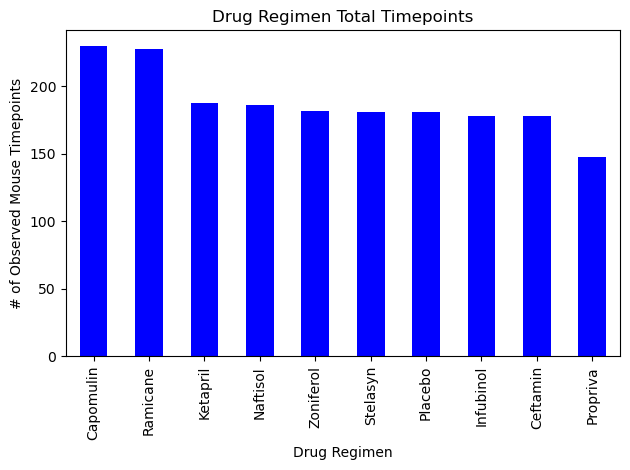

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Generate correct data first through value counting the Drug Regimen column within our cleaned dataframe
# This will return total number referenced for each drug
timepoints_per_drug = cleaned_df['Drug Regimen'].value_counts()

# Create bar plot showing results via Pandas plotting with proper labeling
timepoints_per_drug.plot(kind='bar', color='blue', xlabel="Drug Regimen",
                         ylabel="# of Observed Mouse Timepoints", title="Drug Regimen Total Timepoints")

# Although Pandas plotting method was used, still executed plt.show() to eliminate data object text output
# Utilize tight layout for display
plt.tight_layout()
plt.show()

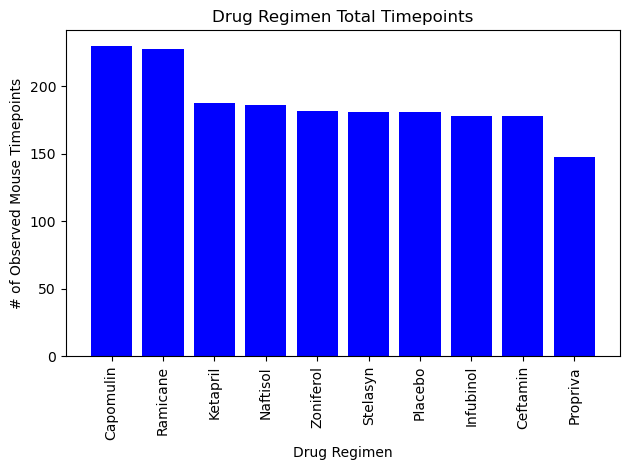

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# First retreive the index (x-axis) and values (y-axis)from our timepoints_per_drug list (defined above) and assign them variables
xvalues = timepoints_per_drug.index
yvalues = timepoints_per_drug.values

# Utilize pyplot and our xvalues/yvalues variables to plot the graph
plt.bar(xvalues, yvalues, color='blue')

# Use pyplot syntax/functions to add appropriate x & y axis labels and title as well as rotation of xticks for display
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Drug Regimen Total Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




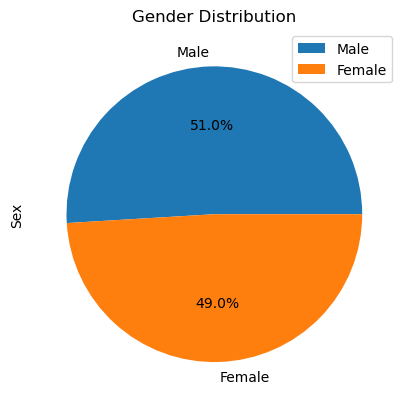

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Retreive an overall value count for each sex listed within our cleaned dataset
gender_count = cleaned_df['Sex'].value_counts()

# Utilize Pandas to plot the above list and display as a pie chart with proper labeling
gender_count.plot(kind='pie', autopct='%1.1f%%', ylabel="Sex", title="Gender Distribution")

# Although Pandas plotting method was used, still executed plt.show() to eliminate data object text output - add legend
plt.legend()
plt.show()


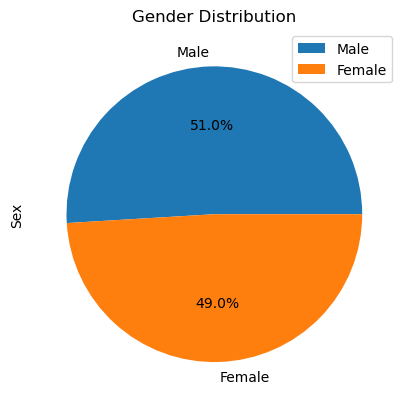

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# First retreive the index (x-axis) and values (y-axis)from our gender_count list (defined above) and assign them variables
labels = gender_count.index
counts = gender_count.values

# Utilize pyplot and our labels/counts (xvalues/yvalues) variables to plot the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# Include appropriate ylabel, legend, title and display
plt.title("Gender Distribution")
plt.ylabel("Sex")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each 

# Grouping by Mouse ID and retrieving the maximum timepoint for each 
last_mouse_timepoint = cleaned_df.groupby(['Mouse ID'])['Timepoint'].max()


# Turning this groupby list object into a dataframe for analysis
last_mouse_timepoint_df = pd.DataFrame(last_mouse_timepoint)
# PLEASE NOTE, THE INDEXES ARE ALREADY APPROPRIATELY RESET! 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Using an inner merge so we only capture associated data from our compolete dataset that aligns with our datapoints from the last mouse timepoint data
# Because our primary dataset was grouped by unique Mouse ID and only the highest/greatest timepoint for each, this merged frame will return 248 entries/rows
combined_df = pd.merge(last_mouse_timepoint_df, complete_data_df, how='inner', on=['Mouse ID', 'Timepoint'])
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Define treatments list to hold only the specific Drug Regimens to be analyzed 
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
# This list will hold the final tumor volume for each mouse within a particular treatment subset
treatment_tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Utilizing a for loop, for each treatment in treatments will subsequently calculate the desired results for each Drug Regimen
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Retrieve the final tumor volume for each mouse's last timepoint if Drug Regimen is equal to one of our treatments within treatments list
    tumor_volume = combined_df.loc[combined_df["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset 
    # Appending our previously created treatment tumor volume list to hold final tumor values for each Drug Regimen within treatments list
    treatment_tumor_volume.append(tumor_volume)

    
    # Determine outliers using upper and lower bounds
    # Utilize Pandas .quantile method to identify quartiles (lower (Q1), mean/middle (Q2) & upper(Q3))
    # Calculate Interquartile Range (Q3-Q1)
    quartiles = tumor_volume.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = quartiles[0.5]
    iqr = upperq - lowerq

    # With IQR and upper/lower quartiles identified, we can calculate outlier ranges
    upper_bound = upperq + (1.5 * iqr)
    lower_bound = lowerq - (1.5 * iqr)

    # Print out a statement for each Drug Regimen that contains potential outliers as identified by being -
    # - greater than our upper bound or lower than our lower bound
    print(f"{treatment}'s potential outliers: {tumor_volume.loc[(tumor_volume > upper_bound) | (tumor_volume < lower_bound)]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


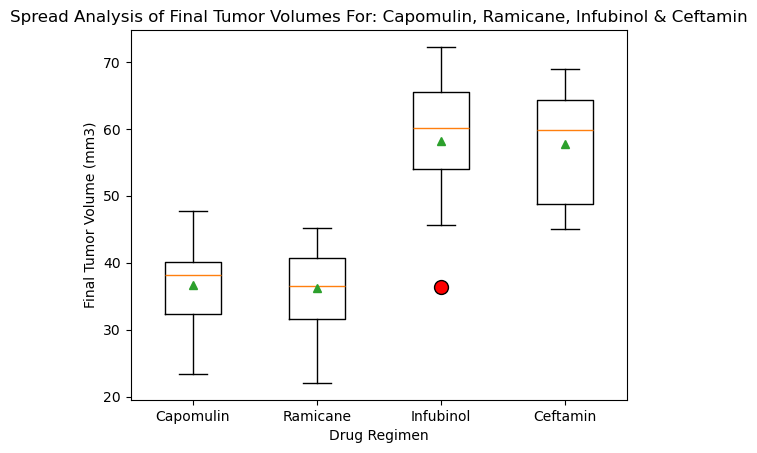

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Now that we have a list containing the final tumor volumes associated with each Drug Regimen within the treatments group -
# - we can simply use plyplot.boxplot to plot this list along with making labels for each subset equalling the respective drug name from treatments list
# Include proper labeling/titles for presentation
plt.boxplot(treatment_tumor_volume, labels = treatments, showmeans = True,
            flierprops = dict(marker='o', markerfacecolor='r', markersize=10, linestyle='none'))
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.title("Spread Analysis of Final Tumor Volumes For: Capomulin, Ramicane, Infubinol & Ceftamin")
plt.show()

## Line and Scatter Plots

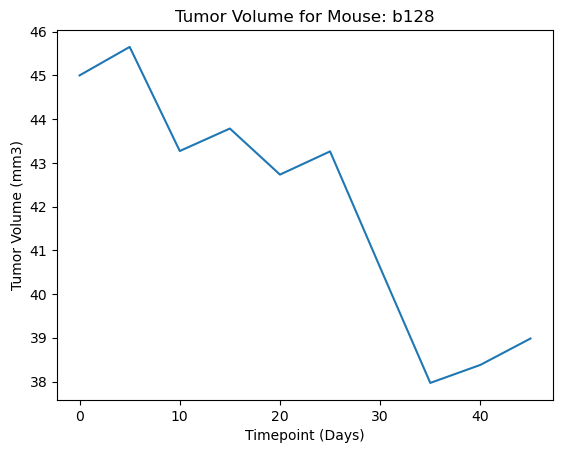

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Create a static dataframe for a single mouse treated with Capomulin (locating only data associated with a single mouse's ID)
capomulin_single_mouse = cleaned_df.loc[cleaned_df['Mouse ID'] == 'b128']

# Utilize this new dataset associated with a single mouse's results treated with Capomulin to plot tumor volume vs. timepoints
plt.plot(capomulin_single_mouse['Timepoint'], capomulin_single_mouse['Tumor Volume (mm3)'])

# Add appropriate labeling/title for display
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume for Mouse: b128")
plt.show()

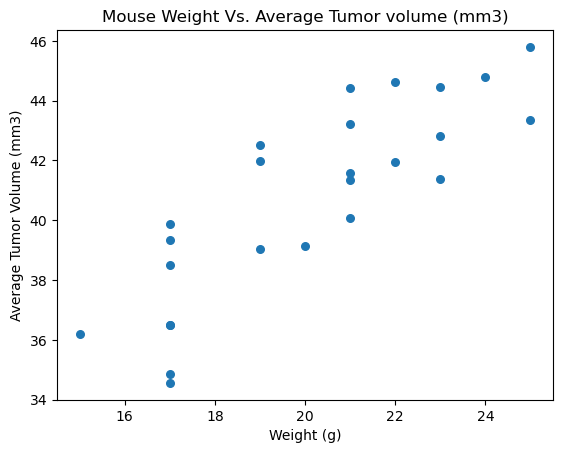

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# First, create a new dataframe from our cleaned dataset that only contains datapoints associated with Capomulin
capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == "Capomulin", :]

# Groupby Mouse ID and calculate the mean/average tumor volume for each mouse as well as the 'first' weights for each mouse
# Using first instead of unique will eliminate returned values being an array
# This will match indexing for each group and allow smooth plotting
average_capomulin_vol = capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
capomulin_mice_weights = capomulin_df.groupby(['Mouse ID'])['Weight (g)'].first()

# Combine each group into a new dataframe linking unique mouse ID's with their weight and average tumor volume
capomulin_weight_v_vol = pd.DataFrame({"Weight (g)": capomulin_mice_weights,
                                       "Average Tumor Volume (mm3)": average_capomulin_vol})

# Utilize Pandas dataframe plotting to graph a scatterplot of the data
# Include appropriate titling/dot sizing for display
capomulin_weight_v_vol.plot(kind='scatter', x='Weight (g)', y='Average Tumor Volume (mm3)',
                            s=30, title='Mouse Weight Vs. Average Tumor volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


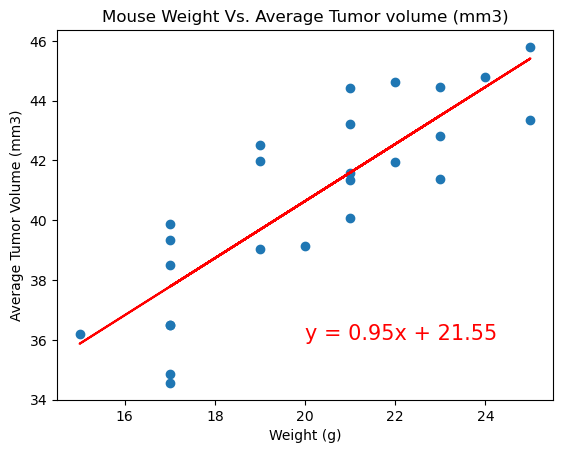

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Utilize Pearson's r to determine the correlation coefficient between the capomulin mice's weights and their average tumor volume
# Access the r value (correlation) via index 0 from the above's output
correlation_calc = st.pearsonr(capomulin_mice_weights, average_capomulin_vol)[0]

# Display our (rounded to two decimal points) Person's r value (correlation coefficient) via a foramtted string
print(f"The correlation between mouse weight and the average tumor volume is {correlation_calc.round(2)}")
# Note that an r value of >= .7, means a STRONG correlation. As such there is a strong correlation between mouse weight and average tumor volume

# Establish x and y values corresponding to our weight and average tumor volume results respectively
# Utilize linregress to calculate our regression line
# Include calculated slope and y intercept values within a variable that will hold the text string of our regression equation (y=mx+b)
x_values = capomulin_weight_v_vol['Weight (g)']
y_values = capomulin_weight_v_vol['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(slope.round(2)) + "x + " + str(intercept.round(2))

# Use pyplot to visualize a scatter plot where we can add our calculated regression line and annotate the line equation
# Include proper labels / title and display
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_equation, (20,36), fontsize=15, color='r')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight Vs. Average Tumor volume (mm3)")
plt.show()
